# **PROYECTO FINAL**
##PRIMERA ENTREGA

MINE-4101: Ciencia de Datos Aplicada<br>
Universidad de los Andes  

Salomón Novoa <br>
Ivan Saavedra <br>
Julian Sanabria <br>
  
Última actualización: 18 Septiembre, 2022

In [ ]:
!pip install --upgrade pandas-profiling

In [53]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
# Importando librerias

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

%matplotlib inline

In [55]:
# Configuración de Pandas para extender el número de filas y columnas a visualizar
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

### Cargando la data

In [56]:
# Cargando el archivo XLSX como dataframe
df = pd.read_excel('/data.xlsx')

In [57]:
# Mostrando las dimensiones del dataframe
df.shape

(1525, 142)

In [58]:
# Mostrando el tipo de columnas
df.dtypes

Client_id                      int64
Identificador Cuenta           int64
Negocio - Valor              float64
Negocio - Valor OK            object
Negocio - Tasa de Interés    float64
                              ...   
43830                        float64
44196                        float64
TU                            object
PREPAGOS                      object
CUOTAS                       float64
Length: 142, dtype: object

In [59]:
# Monstrando las primeras filas
df.head()

,Client_id,Identificador Cuenta,Negocio - Valor,Negocio - Valor OK,Negocio - Tasa de Interés,P.P.Tasa,Negocio - Plazo,Negocio - Plazo OK,P.P.Plazo,Negocio - Sempli Score,Negocio - Sempli Score OK,Negocio - Score Experian Enero/19,Cliente,Cliente valor,Negocio - Fecha de ganado,Negocio - Fecha de ganado.1,Mes,Q,Año ganado,Negocio - Producto (Destinación),Negocio - Producto (Destinación).1,Negocio - Producto (Destinación) OK,Negocio - Plan de Pagos,Organización - Sector,Organización - Sector OK,Sector - Ok,Organización - Canal de Captura,Organización - Canal de Captura OK,Organización - Tipo de Empresa,Organización - Número de empleados,Organización - Número de empleados Mujeres,Organización - Número de empleados Mujeres con cargo directivo,Organización - Número de empleados OK,Organización - Año de Constitución,Organización - Año de Constitución OK,Organización - CIIU,Clase,División,División.1,Actividad eco SEMPLI,Organización - Ciudad,Organización - Ciudad.1,Persona - Cargo,Organización - Estrato,Organización - Acceso a la banca,Negocio - Mujeres Empresarias,Oportunidad/Inclusión,ESG,Empresa - Tratos ganados,Trato - ID,...,Máx Oct19,Máx Nov19,Máx Dic19,Máx Ene20,Máx Feb20,Máx Mar20,Máx Abr20,Máx May20,Máx Jun20,Máx JuL20,Máx Ago20,Máx Sep20,Máx Oct20,Máx Nov20,Máx Dic20,Máx Ene21,Máx Feb21,Máx Mar21,Máx Abr21,Máx May21,Máx Jun21,Máx Jul21,Máx Ago21,Máx Sep21,Máx Oct21,Máx Nov21,Máx Dic21,Máx Ene22,Máx Feb22,Máx Mar22,Máx Abr22,Máx May22,Máx Jun22,Máx Jul22,Máx Ago22,MAX,Deterioro Cartera,Variable predictora,Comportamiento,Mes >=30,Valor mora,icv,icv30,43100,43465,43830,44196,TU,PREPAGOS,CUOTAS
0,97334,1530,80000000.0,0 a 100,1.59,127200000.0,24,13 a 24,1.920000e+09,731.0,670 en adelante,NaN,Nuevo,0,2019-04-30 17:38:45,2019-04-30,2019-04,2019-Q2,2019,KT - EX Nuevos negocios,KT - EX,Growth,Mensual Tasa Fija,Tecnologías,Servicios,Servicios,Referido,Partnerships,Seed,4,1,0,1 a 10,2017.0,2014-2017,6209,Otras actividades de tecnologías de informació...,62,Desarrollo de sistemas informáticos (planifica...,Software and Communications,Medellín,Medellín AM,Socio,5,No,No,Si,No aplica,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,,NaN,1,Bueno,0,Máxima altura entre 1 y 10,Menos de 30,0,4.780213e+07,0.0,NaN,NaN,8.0,20.0,NaN,NaN,1530.0
1,88356,1631,150000000.0,101 a 200,1.61,241500000.0,36,25 a 36,5.400000e+09,679.0,670 en adelante,NaN,Nuevo,0,2019-05-30 16:52:46,2019-05-30,2019-05,2019-Q2,2019,KT - CO Pago proveedores,KT - CO,KT - CO,Mensual Tasa Fija,Servicios,Servicios,Industria,Referido,Partnerships,Growth,40,6,3,11 a 50,2010.0,2010-2013,1104,"Elaboración de bebidas no alcohólicas, producc...",11,Elaboración de bebidas,Manufacturing,Rionegro,Otros,Socio,5,Si,No,No,No aplica,NaN,NaN,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,13.0,6.0,8.0,6.0,6.0,6.0,4.0,0.0,7.0,9.0,NaN,,NaN,16,Atrasado,0,Máxima altura entre 11 y 20,Menos de 30,0,9.831451e+07,0.0,NaN,NaN,7.0,19.0,PAID,NaN,1631.0
2,71133,1589,150000000.0,101 a 200,1.64,246000000.0,36,25 a 36,5.400000e+09,687.0,670 en adelante,NaN,Nuevo,0,2019-05-15 14:30:14,2019-05-15,2019-05,2019-Q2,2019,KT - EX Nuevos negocios,KT - EX,Growth,Mensual Tasa Fija,Servicios,Servicios,Industria,Comercial,Directo,Seed,35,5,2,11 a 50,2016.0,2014-2017,144,Cría de ganado porcino,1,"Agricultura, ganadería, caza y actividades de ...",Manufacturing,Bello,Otros,Socio,4,No,Si,Si,No aplica,NaN,NaN,...,0.0,0.0,0.0,16.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,16.0,21.0,13.0,0.0,16.0,18.0,12.0,12.0,14.0,17.0,10.0,10.0,0.0,8.0,10.0,10.0,10,0.0,21,Atrasado,0,Máxima altura entre 21 y 30,Menos de 30,0,1.298854e+08,0.0,NaN,NaN,7.0,19.0,ACTIVE,NaN,1589.0
3,53289,1582,120000000.0,101 a 200,1.67,200400000.0,36,25 a 36,4.320000e+09,703.0,670 en adelante,NaN,Nuevo,0,2019-05-14 11:23:53,2019-05-14,2019-05,2019-Q2,2019,SP - Pasivos con socios,SP,SP,Mensual Tasa Fija,Tecnología

In [60]:
# Obteniendo las principales estadísticas del dataset
df.describe()

,Client_id,Identificador Cuenta,Negocio - Valor,Negocio - Tasa de Interés,P.P.Tasa,Negocio - Plazo,P.P.Plazo,Negocio - Sempli Score,Negocio - Score Experian Enero/19,Cliente valor,Año ganado,Organización - Número de empleados,Organización - Número de empleados Mujeres,Organización - Número de empleados Mujeres con cargo directivo,Organización - Año de Constitución,Organización - CIIU,División,Organización - Estrato,Empresa - Tratos ganados,Trato - ID,Empresa - Edad Empresarios,Máx Marzo17,Máx Abril17,Máx Mayo17,Máx Junio17,Máx Julio17,Máx Agos17,Máx Sept17,Máx Oct17,Máx Nov17,Máx Dic17,Máx Enero18,Máx Feb18,Máx Marzo18,Máx Abril18,Máx Mayo18,Máx Junio18,Máx Julio18,Máx Agos18,Máx Sept18,Máx Oct18,Máx Nov18,Máx Dic18,Máx Ene19,Máx Feb19,Máx Mar19,Máx Abr19,Máx May19,Máx Jun19,Máx Jul19,Máx Ago19,Máx Sep19,Máx Oct19,Máx Nov19,Máx Dic19,Máx Ene20,Máx Feb20,Máx Mar20,Máx Abr20,Máx May20,Máx Jun20,Máx JuL20,Máx Ago20,Máx Sep20,Máx Oct20,Máx Nov20,Máx Dic20,Máx Ene21,Máx Feb21,Máx Mar21,Máx Abr21,Máx May21,Máx Jun21,Máx Jul21,Máx Ago21,Máx Sep21,Máx Oct21,Máx Nov21,Máx Dic21,Máx Ene22,Máx Feb22,Máx Mar22,Máx Abr22,Máx May22,Máx Jun22,Máx Ago22,MAX,Variable predictora,Valor mora,icv,icv30,43100,43465,43830,44196,CUOTAS
count,1525.000000,1525.000000,1.525000e+03,1525.000000,1.525000e+03,1525.000000,1.525000e+03,1140.000000,54.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1406.000000,1525.00000,1525.000000,1525.000000,1201.000000,1143.000000,1511.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,5.0,5.000000,7.000000,8.000000,9.000000,10.000000,11.000000,11.000000,13.000000,17.000000,33.00000,35.000000,45.000000,95.000000,135.000000,165.000000,216.000000,240.000000,271.000000,296.000000,337.000000,392.000000,449.000000,477.000000,557.000000,609.000000,663.000000,729.000000,803.000000,881.00000,980.000000,1037.000000,1114.000000,1218.000000,1292.000000,1336.000000,1376.000000,1366.000000,1525.000000,1525.000000,1525.000000,1.650000e+02,392.0,0.0,0.0,11.000000,271.000000,1450.000000
mean,50490.114754,4612.026230,8.150311e+07,1.441161,1.182453e+08,33.197377,2.769907e+09,756.495614,791.777778,0.526557,2021.167869,16.211148,7.396721,1.394754,2007.430299,5348.88000,53.325246,4.071475,1.703580,8575.700787,41.534745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.400000,0.142857,1.750000,0.111111,0.100000,0.818182,2.363636,0.384615,1.352941,0.30303,0.428571,0.422222,0.526316,0.096296,0.466667,0.805556,1.483333,1.202952,2.010135,2.851632,3.400510,5.106904,5.251572,5.804309,6.223317,8.618401,8.150892,9.703611,9.46311,4.685714,9.688525,9.999102,9.387521,12.826625,13.002994,13.105378,15.994876,23.836066,0.168525,0.183607,8.382716e+07,0.0,NaN,NaN,4.454545,3.929889,4553.547586
std,28504.623470,813.588145,5.992203e+07,0.159165,9.009397e+07,8.388906,2.276596e+09,100.447825,79.175388,0.499458,0.726796,31.906071,14.576772,1.635875,120.108174,1969.09121,19.593786,1.090164,1.141809,1893.512890,69.843306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,7.056912,0.377964,4.949747,0.333333,0.316228,2.400757,5.104365,1.386750,3.904183,1.31065,1.289909,1.616518,3.306480,0.700470,2.182339,3.207428,6.192158,6.609712,9.050324,11.395041,13.696763,16.601344,20.372261,23.165718,26.560372,29.913583,30.414477,33.601439,35.42452,13.593140,38.446779,40.584000,43.328019,46.661953,49.550761,48.109464,56.436609,60.889680,0.374454,0.387290,6.114519e+07,0.0,NaN,NaN,2.733629,3.475666,791.450929
min,34.000000,1530.000000,1.609266e+06,1.150000,2.542641e+06,2.000000,3.218533e+06,0.000000,556.000000,0.000000,2019.000000,0.000000,0.000000,0.000000,0.000000,130.00000,1.000000,0.000000,0.000000,65.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

### Perfilando la data

In [ ]:
profile = ProfileReport(df)

In [ ]:
profile.to_notebook_iframe()

# Creando *cliente riesgoso*

In [63]:
df['cliente riesgoso']=df['Variable predictora']

# Eliminando Client_id e Identificador Cuenta

In [64]:
df=df.drop(['Client_id', 'Identificador Cuenta'], axis=1)

In [35]:
# Mostrando las columnas
print(df.columns)

Index([                  'Negocio - Valor',
                      'Negocio - Valor OK',
               'Negocio - Tasa de Interés',
                                'P.P.Tasa',
                         'Negocio - Plazo',
                      'Negocio - Plazo OK',
                               'P.P.Plazo',
                  'Negocio - Sempli Score',
               'Negocio - Sempli Score OK',
       'Negocio - Score Experian Enero/19',
       ...
                                     'icv',
                                   'icv30',
                                     43100,
                                     43465,
                                     43830,
                                     44196,
                                      'TU',
                                'PREPAGOS',
                                  'CUOTAS',
                        'cliente riesgoso'],
      dtype='object', length=141)


# Análisis Exploratorio de datos (EDA) y Visualización

**Cliente riesgoso**

1 = Clientes de alto riesgo, es decir que tienen 2 moras o más, cada una mayor a 15 días en los útlimos 6 meses.

0 = Clientes de bajo riesgo, es decir que tienen menos de 2 moras, cada una mayor a 15 días en los útlimos 6 meses.


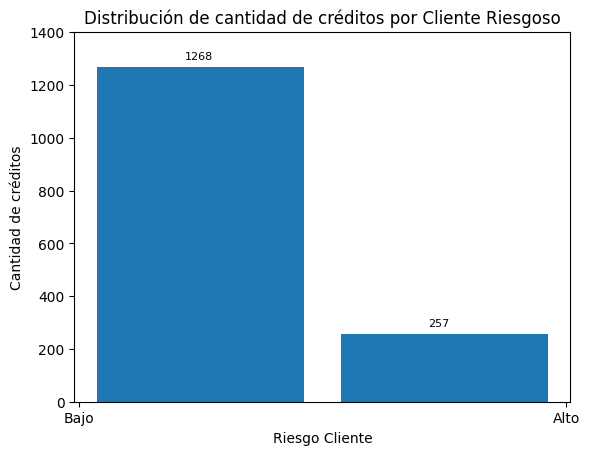

In [65]:
# Variable de si el cliente es riesgoso (1) o no (0)
fig, ax = plt.subplots()
ax.set_ylim(0, 1400)
ax.set_title('Distribución de cantidad de créditos por Cliente Riesgoso')
ax.set_ylabel('Cantidad de créditos')
ax.set_xlabel('Riesgo Cliente')
plt.xticks([0, 1],['Bajo', 'Alto'])
v, m, g = ax.hist(df['cliente riesgoso'], bins = 2, rwidth=0.85)
for i, rect in enumerate(g):
    posx = rect.get_x()
    posy = rect.get_height()
    ax.text(posx + 0.18, posy + 30, int(v[i]), color='black', fontsize = 8)
plt.show()


##Comparación nivel de riesgo de clientes, con el valor del préstamo
Al comparar si un cliente es de alto riesgo o bajo riesgo con el valor del negocio, no se encontró una diferencia relevante

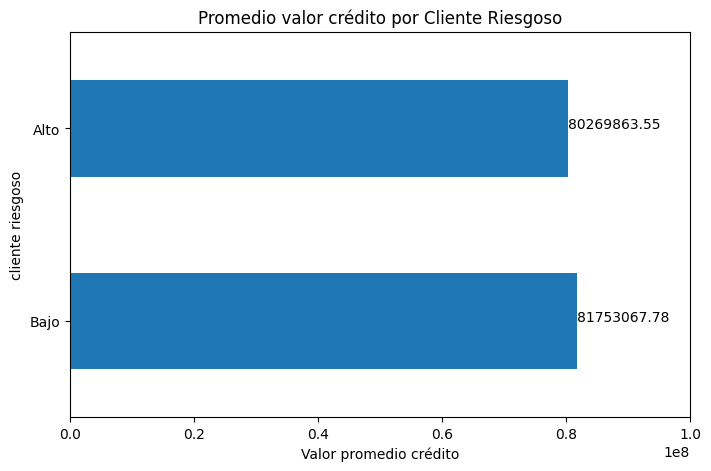

In [78]:
plt.figure(figsize =(8, 5))
ax = df.groupby('cliente riesgoso')['Negocio - Valor'].mean().round(2).plot.barh()

ax.set_xlabel('Valor promedio crédito')
ax.set_title('Promedio valor crédito por Cliente Riesgoso')
plt.yticks([0, 1],['Bajo', 'Alto'])
ax.set_xlim(0, 100000000)
for rect in ax.patches:
    ax.text(
        rect.get_width() + .2,
        rect.get_y() + rect.get_height() / 2 ,
        rect.get_width(),
        fontsize=10
    )


## Comparación nivel de riesgo de clientes con el valor de las tasas de interés
Al comparar si un cliente es de alto riesgo o bajo riesgo con el valor de las tasas de interés, no se encontró una diferencia relevante

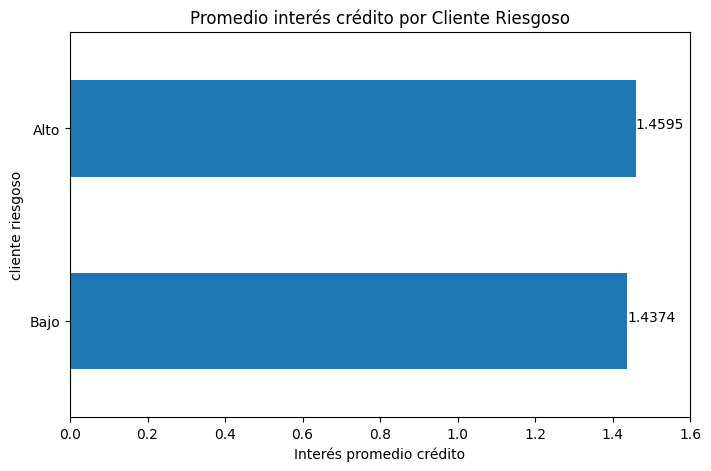

In [77]:
plt.figure(figsize =(8, 5))
ax = df.groupby('cliente riesgoso')['Negocio - Tasa de Interés'].mean().round(4).plot.barh()

ax.set_xlabel('Interés promedio crédito')
ax.set_title('Promedio interés crédito por Cliente Riesgoso')
plt.yticks([0, 1],['Bajo', 'Alto'])
ax.set_xlim(0, 1.6)
for rect in ax.patches:
    ax.text(
        rect.get_width() + 0,
        rect.get_y() + rect.get_height() / 2 ,
        rect.get_width(),
        fontsize=10
    )

##Comparación nivel de riesgo de clientes, con el Sempli Score
Una de las dudas que presentaba la empresa era que el Sempli Score, un score calculado por la empresa para medir el riesgo, era eficiente al momento de diferenciar si los clientes son riesgosos o no, con la gráfica podemos inferir que no es un gran diferenciador

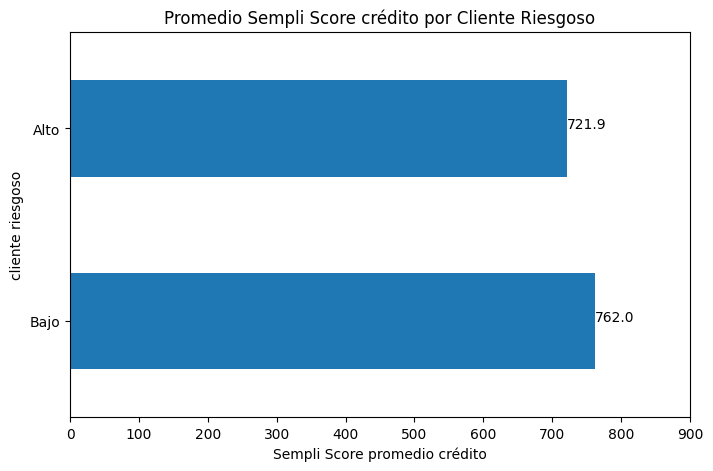

In [75]:
plt.figure(figsize =(8, 5))
ax = df.groupby('cliente riesgoso')['Negocio - Sempli Score'].mean().round(1).plot.barh()
ax.set_xlabel('Sempli Score promedio crédito')
ax.set_title('Promedio Sempli Score crédito por Cliente Riesgoso')
plt.yticks([0, 1],['Bajo', 'Alto'])
ax.set_xlim(0, 900)
for rect in ax.patches:
    ax.text(
        rect.get_width() + 0,
        rect.get_y() + rect.get_height() / 2 ,
        rect.get_width(),
        fontsize=10
    )

##Comparación de cohorte de los años, con proporción de clientes riesgosos
Se evidencia que Sempli ha hecho una buena gestión en disminuir la cantidad de clientes riesgosos en comparación con el total de cada año

<Figure size 800x500 with 0 Axes>

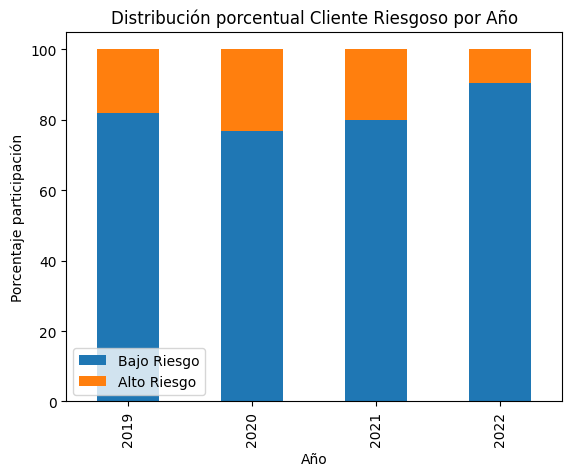

In [76]:
plt.figure(figsize =(8, 5))
ax = pd.crosstab(index=df['Año ganado'],
            columns=df['cliente riesgoso']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar', stacked = 'True')
ax.set_xlabel('Año')
ax.set_ylabel('Porcentaje participación')
ax.set_title('Distribución porcentual Cliente Riesgoso por Año')
L=plt.legend(loc='lower left')
L.get_texts()[0].set_text('Bajo Riesgo')
L.get_texts()[1].set_text('Alto Riesgo')

##Comparación del sector con la cantidad de proporción de riesgosos
Se evidencia, que el sector con mayor nivel de riesgo es el de las tecnologías, seguido por Industria, Comercio y Servicios, por lo cual se aconseja, tener en cuenta esta variable al momento de dar un préstamo

<Figure size 800x500 with 0 Axes>

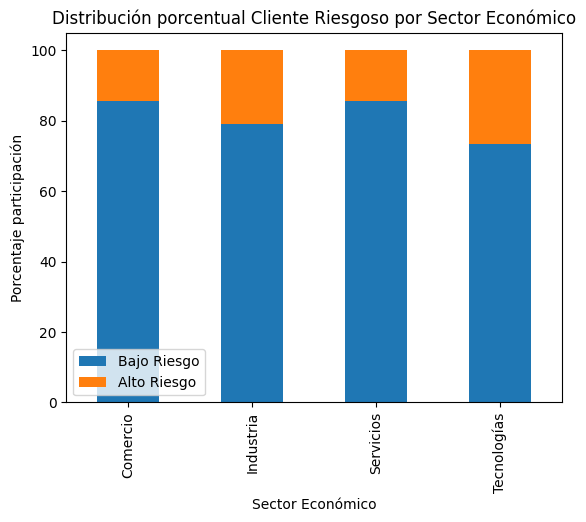

In [81]:
plt.figure(figsize =(8, 5))
ax = pd.crosstab(index=df['Organización - Sector'],
            columns=df['cliente riesgoso']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar', stacked = 'True')
ax.set_xlabel('Sector Económico')
ax.set_ylabel('Porcentaje participación')
ax.set_title('Distribución porcentual Cliente Riesgoso por Sector Económico')
L=plt.legend(loc='lower left')
L.get_texts()[0].set_text('Bajo Riesgo')
L.get_texts()[1].set_text('Alto Riesgo')


##Comparación del canal de captura con proporción de clientes riesgosos
Se evidencia que el canal de captura de los clientes si impacta en el nivel de riesgo, donde los que son conseguidos por medios digitales tienen el mayor nivel de riesgo aunque este canal es el que trae la menor cantidad de créditos. Los que son capturados por los canales directo y partnetships tienen el menor riesgo

In [ ]:
#Obteniendo la frecuencia de créditos por canal de captura
df['Organización - Canal de Captura OK'].value_counts()

Posicionamiento    675
Partnerships       414
Directo            336
Digital            100
Name: Organización - Canal de Captura OK, dtype: int64

<Figure size 800x500 with 0 Axes>

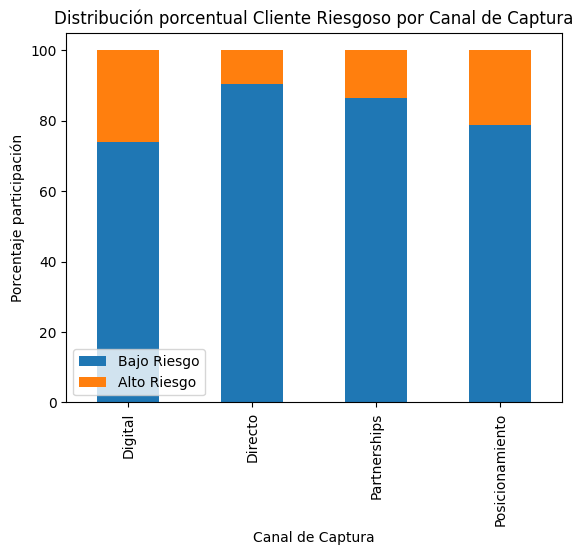

In [83]:
plt.figure(figsize =(8, 5))
ax = pd.crosstab(index=df['Organización - Canal de Captura OK'],
            columns=df['cliente riesgoso']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar', stacked = 'True')
ax.set_xlabel('Canal de Captura')
ax.set_ylabel('Porcentaje participación')
ax.set_title('Distribución porcentual Cliente Riesgoso por Canal de Captura')
L=plt.legend(loc='lower left')
L.get_texts()[0].set_text('Bajo Riesgo')
L.get_texts()[1].set_text('Alto Riesgo')

##Comparación del tipo de empresa con proporción de clientes riesgosos
El gráfico muestra que el nivel de crecimiento en el cual se encuentra la empresa no parece ser significativo para determinar el nivel de riesgo de un cliente

In [ ]:
# Se procede a hacer conteo de créditos según el nivel de crecimiento en el cual se encuentra la empresa
df['Organización - Tipo de Empresa'].value_counts()

Seed        957
Venture     321
Scale Up    187
Growth       60
Name: Organización - Tipo de Empresa, dtype: int64

<Figure size 800x500 with 0 Axes>

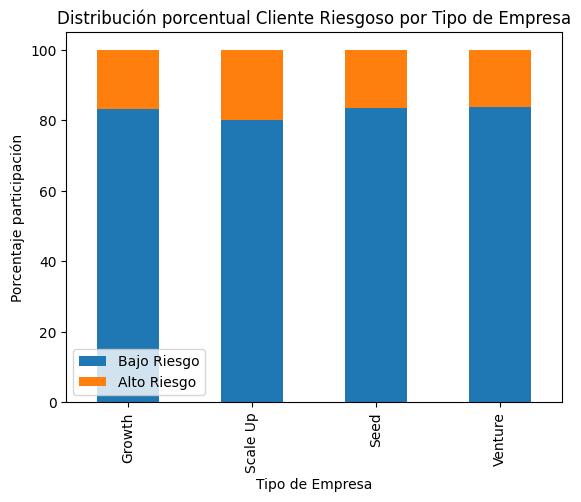

In [87]:
plt.figure(figsize =(8, 5))
ax = pd.crosstab(index=df['Organización - Tipo de Empresa'],
            columns=df['cliente riesgoso']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar', stacked = 'True')
ax.set_xlabel('Tipo de Empresa')
ax.set_ylabel('Porcentaje participación')
ax.set_title('Distribución porcentual Cliente Riesgoso por Tipo de Empresa')
L=plt.legend(loc='lower left')
L.get_texts()[0].set_text('Bajo Riesgo')
L.get_texts()[1].set_text('Alto Riesgo')

##Comparación de promedio de la cantidad de empleados con clientes riesgosos
La gráfica muestra que a medida que las empresas tienen más empleados tienden a ser más riesgosos


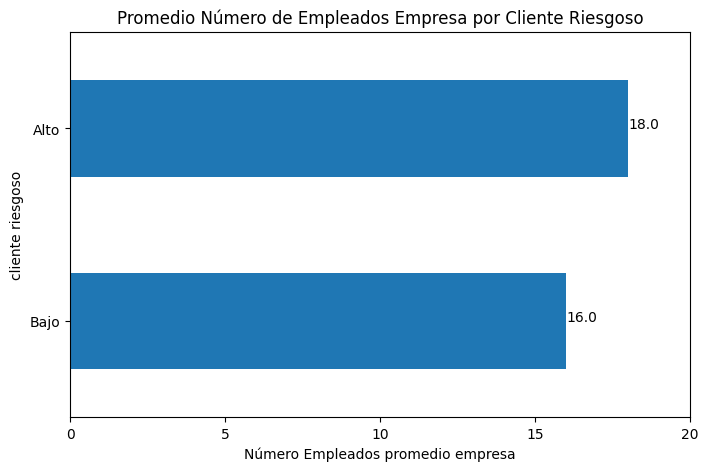

In [88]:
plt.figure(figsize =(8, 5))
ax = df.groupby('cliente riesgoso')['Organización - Número de empleados'].mean().round(0).plot.barh()

ax.set_xlabel('Número Empleados promedio empresa')
ax.set_title('Promedio Número de Empleados Empresa por Cliente Riesgoso')
plt.yticks([0, 1],['Bajo', 'Alto'])
plt.xticks([0, 5, 10, 15, 20])
ax.set_xlim(0, 20)
for rect in ax.patches:
    ax.text(
        rect.get_width() + 0,
        rect.get_y() + rect.get_height() / 2 ,
        rect.get_width(),
        fontsize=10
    )

## Comparación de propoción de empleadas con clientes riesgosos
La proporción de mujeres en una empresa no muestra que sea una variable diferenciadora para el nivel de riesgo de las empresas

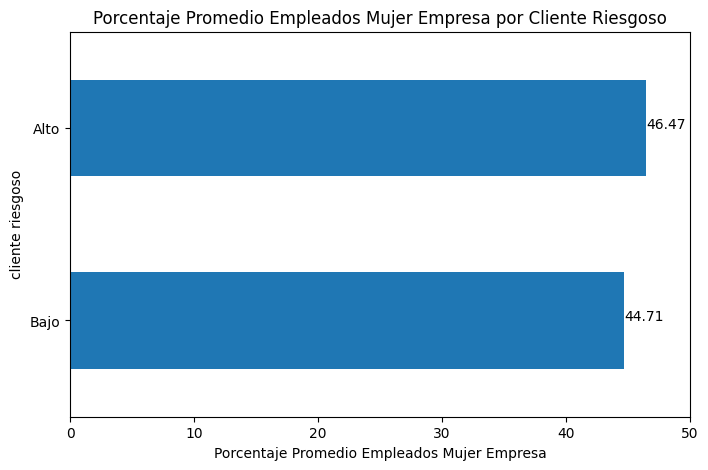

In [90]:
df['proporcion mujeres']= (df['Organización - Número de empleados Mujeres']/df['Organización - Número de empleados'])*100
plt.figure(figsize =(8, 5))
ax = df.groupby('cliente riesgoso')['proporcion mujeres'].mean().round(2).plot.barh()
ax.set_xlabel('Porcentaje Promedio Empleados Mujer Empresa')
ax.set_title('Porcentaje Promedio Empleados Mujer Empresa por Cliente Riesgoso')
plt.yticks([0, 1],['Bajo', 'Alto'])
ax.set_xlim(0, 50)
for rect in ax.patches:
    ax.text(
        rect.get_width() + 0,
        rect.get_y() + rect.get_height() / 2 ,
        rect.get_width(),
        fontsize=10
    )

## Año de constitución de la empresa vs nivel de riesgo
La edad de la empresa no muestra ser una variable diferenciadora para el nivel de riesgo de la empresa

<Figure size 800x500 with 0 Axes>

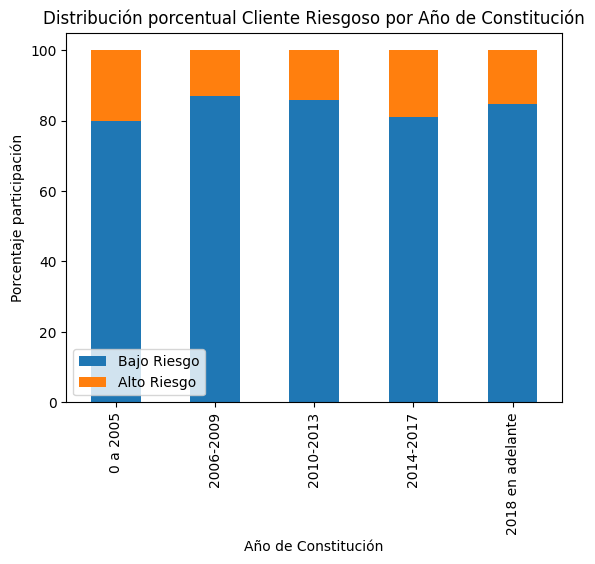

In [89]:
plt.figure(figsize =(8, 5))
ax = pd.crosstab(index=df['Organización - Año de Constitución OK'],
            columns=df['cliente riesgoso']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar', stacked = 'True')
ax.set_xlabel('Año de Constitución')
ax.set_ylabel('Porcentaje participación')
ax.set_title('Distribución porcentual Cliente Riesgoso por Año de Constitución')
L=plt.legend(loc='lower left')
L.get_texts()[0].set_text('Bajo Riesgo')
L.get_texts()[1].set_text('Alto Riesgo')

# Comparación de ciudades vs nivel de riesgo del cliente
*(se encuentra agrupado de esta forma por la cantidad de clientes existentes, en Bogotá y Medellín son las ciudades con mayor frecuencia)*

No se evidencia una gran diferencia en cuanto al nivel de riesgo de los clientes para las principales ciudades

In [84]:
# Se procede a hacer conteo de créditos según la ciudad en la cual se encuentra la empresa
df['Organización - Ciudad'].value_counts()

Bogotá D.C.                  712
Medellín                     400
Barranquilla                  82
Bogotá                        60
Envigado                      53
Cali                          47
Bucaramanga                   22
Sabaneta                      22
Itagüí                        15
Pereira                       13
Cartagena                     11
Rionegro                      10
Bello                         10
Mosquera                       9
Cartagena de indias            8
Medellin                       6
Cajicá                         4
Marinilla                      4
Armenia                        4
La estrella                    4
Cúcuta                         3
La Estrella                    3
Manizales                      3
Santa Marta                    3
Caldas                         2
La ceja                        2
Soacha                         2
Copacabana                     2
Girardota                      2
San Pedro de los Milagros      2
La Unión  

<Figure size 800x500 with 0 Axes>

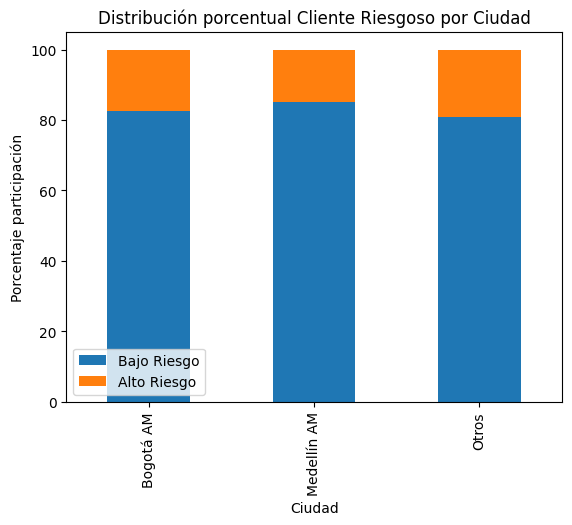

In [86]:
plt.figure(figsize =(8, 5))
ax = pd.crosstab(index=df['Organización - Ciudad.1'],
            columns=df['cliente riesgoso']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar', stacked = 'True')
ax.set_xlabel('Ciudad')
ax.set_ylabel('Porcentaje participación')
ax.set_title('Distribución porcentual Cliente Riesgoso por Ciudad')
L=plt.legend(loc='lower left')
L.get_texts()[0].set_text('Bajo Riesgo')
L.get_texts()[1].set_text('Alto Riesgo')